In [1]:
import pandas as pd
import os
import csv
#Veriyi Okuma
real_df = pd.read_csv("real_phishing_dataset.csv")
synthetic_df = pd.read_csv("synthetic_phishing_dataset.csv")
parafraz_df = pd.read_csv("parafraz_phishing_dataset.csv")

In [2]:
#VERİYİ YÜKLE
real_df = real_df[["text", "label"]]
synthetic_df = synthetic_df[["text", "label"]]
parafraz_df = parafraz_df[["text", "label"]]

In [3]:
#GEREKSİZ KOLONLARI KALDIR
real_df = real_df[["text", "label"]]
synthetic_df = synthetic_df[["text", "label"]]
parafraz_df = parafraz_df[["text", "label"]]

In [4]:
#BOŞ veya GEÇERSİZ KAYITLARI TEMİZLE
real_df = real_df.dropna()
synthetic_df = synthetic_df.dropna()
parafraz_df = parafraz_df.dropna()

In [5]:
#AŞIRI KISA veya AŞIRI UZUN KAYITLARI TEMİZLE
real_df = real_df[real_df["text"].str.len() > 30]
synthetic_df = synthetic_df[synthetic_df["text"].str.len() > 30]
parafraz_df = parafraz_df[parafraz_df["text"].str.len() > 30]

In [11]:
#Veri Temizleme İşlemleri
import re

def clean_text(text):
    text = str(text).lower()  # küçük harfe çevir
    text = re.sub(r'\W+', ' ', text)  # özel karakterleri sil
    text = re.sub(r'\s+', ' ', text).strip()  # fazla boşlukları sil
    return text

real_df["text"] = real_df["text"].apply(clean_text)


In [6]:
real_df.head()

,text,label
0,"hpl nom for may 25 , 2001 ( see attached file ...",0.0
1,re : nom / actual vols for 24 th - - - - - - -...,0.0
2,"enron actuals for march 30 - april 1 , 201 est...",0.0
3,"hpl nom for may 30 , 2001 ( see attached file ...",0.0
4,"hpl nom for june 1 , 2001 ( see attached file ...",0.0


In [7]:
len(real_df)

217170

In [8]:
#Kutuphane
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [15]:
#Gerçek Veri Üzerinde Model Eğitimi
# Text ve label kolonlarını al
X = real_df["text"]
y = real_df["label"]

# Eğitim ve test verisini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modeli kur ve eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Tahmin yap
y_pred = model.predict(X_test_vec)

# Sonuçları yazdır
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     22569
         1.0       0.97      0.97      0.97     20865

    accuracy                           0.97     43434
   macro avg       0.97      0.97      0.97     43434
weighted avg       0.97      0.97      0.97     43434

✅ Accuracy: 0.9733


In [16]:
import pickle

pickle.dump(model, open("ml_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb")) 

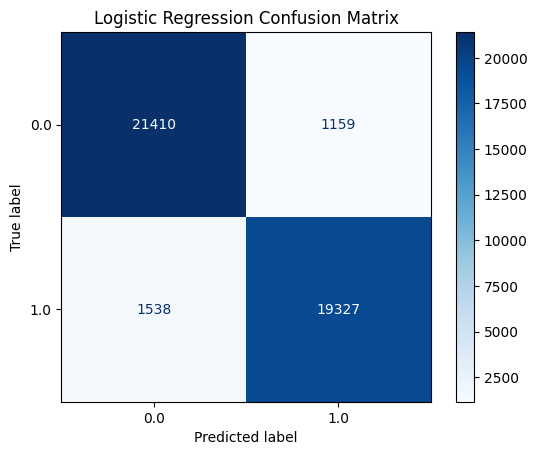

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Gerçek ve tahmin değerlerini kullan
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("logistic_confusion.png")
plt.show()

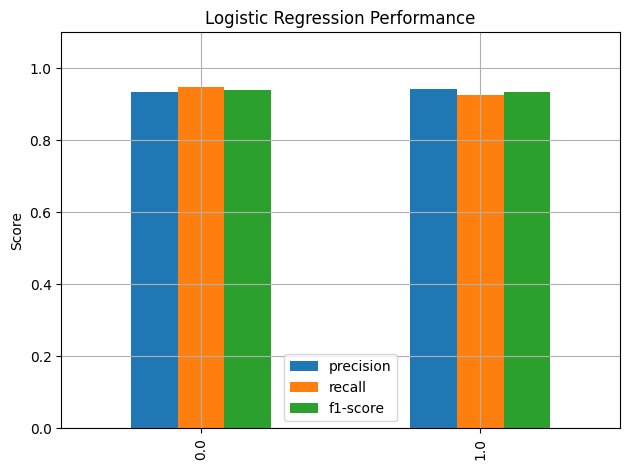

In [27]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Raporu al ve dataframe'e çevir
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:2, :3]  # sadece 0.0 ve 1.0 sınıfı için

df_report.plot(kind='bar')
plt.title("Logistic Regression Performance")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.savefig("logistic_performance.png")
plt.show()

In [18]:
# Eğitim ve test doğruluklarını hesapla
train_acc = model.score(X_train_vec, y_train)
test_acc = model.score(X_test_vec, y_test)

print(f"🎓 Eğitim Doğruluğu: {train_acc:.4f}")
print(f"🧪 Test Doğruluğu  : {test_acc:.4f}")

# Aşırı fark varsa uyarı ver
if train_acc - test_acc > 0.05:
    print("⚠️ Aşırı öğrenme (overfitting) olabilir!")
else:
    print("✅ Overfitting görünmüyor.")

🎓 Eğitim Doğruluğu: 0.9757
🧪 Test Doğruluğu  : 0.9733
✅ Overfitting görünmüyor.


In [10]:
#Gerçek Veri Üzerinde Model Eğitimi
# Text ve label kolonlarını al
X = real_df["text"]
y = real_df["label"]

# Eğitim ve test verisini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
#Support Vector Machine (LinearSVC)
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

model = LinearSVC()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.9769535387023991
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     22569
         1.0       0.97      0.98      0.98     20865

    accuracy                           0.98     43434
   macro avg       0.98      0.98      0.98     43434
weighted avg       0.98      0.98      0.98     43434



In [12]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9808675231385551
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     22569
         1.0       0.98      0.98      0.98     20865

    accuracy                           0.98     43434
   macro avg       0.98      0.98      0.98     43434
weighted avg       0.98      0.98      0.98     43434



In [13]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/150.0 MB ? eta -:--:--
                                              0.0/150.0 MB ? eta -:--:--
                                              0.0/150.0 MB ? eta -:--:--
                                            0.0/150.0 MB 660.6 kB/s eta 0:03:47
                                            0.0/150.0 MB 495.5 kB/s eta 0:05:03
                                            0.0/150.0 MB 495.5 kB/s eta 0:05:03
                                            0.1/150.0 MB 409.6 kB/s eta 0:06:06
                                            0.1/150.0 MB 353.1 kB/s eta 0:07:05
                                            0.1/150.0 MB 353.1 kB/s eta 0:07:05
                                            0.1/150.0 MB 353.1 kB/s eta 0:07:05
                                            0.1/150.0 MB 353.1 kB/s eta 0:07:05
                                            0.1/150.0 MB 252.2 kB/s eta 0:09:55
                                            0.1/150.0 MB 252.

In [14]:
#XGBoost Classifier

from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\akife\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:29:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     22569
         1.0       0.97      0.98      0.97     20865

    accuracy                           0.97     43434
   macro avg       0.97      0.97      0.97     43434
weighted avg       0.97      0.97      0.97     43434



In [16]:
#Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.937905788092278
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     22569
         1.0       0.94      0.93      0.93     20865

    accuracy                           0.94     43434
   macro avg       0.94      0.94      0.94     43434
weighted avg       0.94      0.94      0.94     43434



In [19]:
# Eğitim: sentetik, Test: gerçek

# Sentetik
X_synth = synthetic_df["text"]
y_synth = synthetic_df["label"]
X_synth_train, X_synth_test, y_synth_train, y_synth_test = train_test_split(X_synth, y_synth, test_size=0.2, random_state=42)

# Gerçek test verisi
X_real_test = real_df["text"]
y_real_test = real_df["label"]

# TF-IDF (sadece sentetikle fit)
vectorizer = TfidfVectorizer(max_features=5000)
X_synth_train_vec = vectorizer.fit_transform(X_synth_train)
X_real_test_vec = vectorizer.transform(X_real_test)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_synth_train_vec, y_synth_train)

# Test
y_pred = model.predict(X_real_test_vec)
print("📊 Sentetik Eğitim - Gerçek Test")
print(classification_report(y_real_test, y_pred))


📊 Sentetik Eğitim - Gerçek Test
              precision    recall  f1-score   support

         0.0       0.56      0.85      0.68    113114
         1.0       0.63      0.29      0.39    104056

    accuracy                           0.58    217170
   macro avg       0.60      0.57      0.54    217170
weighted avg       0.60      0.58      0.54    217170



In [20]:
# Eğitim verisi: gerçek
X_real = real_df["text"]
y_real = real_df["label"]
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Test verisi: parafraz
X_parafraz = parafraz_df["text"]
y_parafraz = parafraz_df["label"]

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_real_train_vec = vectorizer.fit_transform(X_real_train)
X_parafraz_vec = vectorizer.transform(X_parafraz)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_real_train_vec, y_real_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_parafraz_vec)

print("📊 Gerçek Eğitim - Parafraz Test")
from sklearn.metrics import classification_report
print(classification_report(y_parafraz, y_pred))


📊 Gerçek Eğitim - Parafraz Test
              precision    recall  f1-score   support

           0       1.00      0.27      0.42      1000
           1       0.58      1.00      0.73      1000

    accuracy                           0.63      2000
   macro avg       0.79      0.63      0.58      2000
weighted avg       0.79      0.63      0.58      2000

